In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def P(phi, A):
    return (1 + A*np.cos(phi))/(2*np.pi)

In [126]:
def getAngleAR(A): # The Acception/Rejection method
    success = False
    fail = -1
    while success == False:
        fail += 1
        x = np.random.uniform()/(2*np.pi)*(1+A)
        y = np.random.uniform()*2*np.pi
        if x <= P(y, A):
            success = True
    return [y, fail]

In [74]:
def ex2b():
    t = 100
    dt = 1
    steps = int(t/dt)
    x = np.zeros(steps)
    y = np.zeros(steps)
    r = 1
    A = 0.5
    for i in range(1, steps):
        angle = getAngleAR()[0]
        x[i] = x[i-1] + r * np.cos(angle)
        y[i] = y[i-1] + r * np.sin(angle)
    plt.plot(x, y)
    return x, y

In [75]:
def ex2d(N, bias, step):
    N_iter = N
    A = bias
    steps = step
    x = np.zeros(steps)
    y = np.zeros(steps)
    r = 1
    X = np.zeros(N_iter)
    for j in range(N_iter):
        for i in range(1, steps):
            angle = getAngleAR(A)[0]
            x[i] = x[i-1] + r * np.cos(angle)
            y[i] = y[i-1] + r * np.sin(angle)
        X[j] = x[-1]
    return np.mean(X), A*steps*r/2

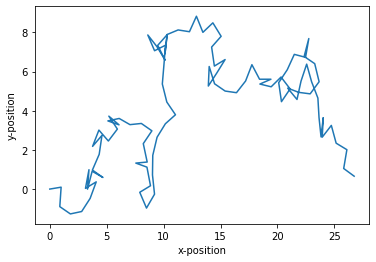

In [68]:
x,y = ex2b()
plt.xlabel("x-position")
plt.ylabel("y-position")
plt.savefig('figures\\2b_MC-trajectory.png', dpi=300, bbox_inches='tight')

In [84]:
avSimA = np.zeros(11)
avSimN = np.zeros(20)
avAnaA = np.zeros(11)
avAnaN = np.zeros(20)
for i in range(0, 11):
    avSimA[i], avAnaA[i] = ex2d(100, i*0.1, 100)

for i in range(0, 20):
    avSimN[i], avAnaN[i] = ex2d(100, 0.5, 5*(i+1))

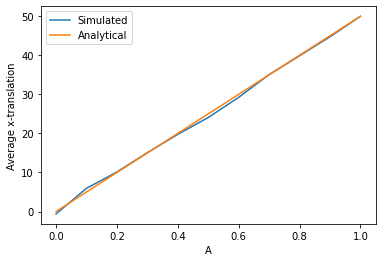

In [95]:
x = np.linspace(0, 1, 11)
plt.plot(x, avSimA)
plt.plot(x, avAnaA)
plt.legend(["Simulated", "Analytical"])
plt.xlabel("A")
plt.ylabel("Average x-translation")
plt.savefig('figures\\2d_A.png', dpi=300, bbox_inches='tight')

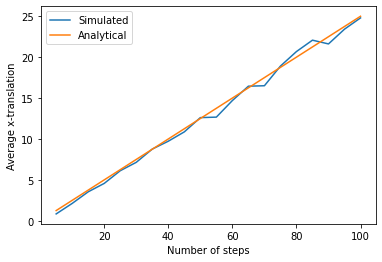

In [98]:
x = np.linspace(5, 100, 20)
plt.plot(x, avSimN)
plt.plot(x, avAnaN)
plt.legend(["Simulated", "Analytical"])
plt.xlabel("Number of steps")
plt.ylabel("Average x-translation")
plt.savefig('figures\\2d_N.png', dpi=300, bbox_inches='tight')

In [76]:
def ex2f(N, step):
    N_iter = N
    A = 0.5
    steps = step
    x = np.zeros(steps)
    y = np.zeros(steps)
    r = 1
    X = np.zeros(N_iter)
    for j in range(N_iter):
        for i in range(1, steps):
            angle = getAngleAR(A)[0]
            x[i] = x[i-1] + r * np.cos(angle)
            y[i] = y[i-1] + r * np.sin(angle)
        X[j] = x[-1]
    Xsqr = X**2
    return np.mean(Xsqr) - np.mean(X)**2, steps*r**2 * (1 - (A**2)/2)/2

In [113]:
varSim = np.zeros(20)
varAna = np.zeros(20)

for i in range(20):
    varSim[i], varAna[i] = ex2f(100, 5*(i+1))

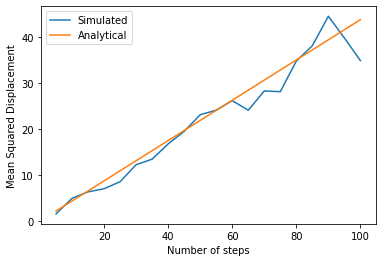

In [115]:
x = np.linspace(5, 100, 20)
plt.plot(x, varSim)
plt.plot(x, varAna)
plt.legend(["Simulated", "Analytical"])
plt.xlabel("Number of steps")
plt.ylabel("Mean Squared Displacement")
plt.savefig('figures\\2f_MSD.png', dpi=300, bbox_inches='tight')

# Exercise 2g

In [77]:
def g(phi, A):
    if phi < 0:
        return 0
    elif phi < 2*np.pi/3:
        return (1 + A)/(2*np.pi)
    elif phi <= 4*np.pi/3:
        return (1 - A/2)/(2*np.pi)
    elif phi <= 2*np.pi:
        return (1 + A)/(2*np.pi)
    else:
        return 0

In [97]:
def G(phi, A):
    if phi < 0:
        return 0
    elif phi < 2*np.pi/3:
        return ((phi + A*phi)/(2*np.pi))
    elif phi <= 4*np.pi/3:
        return ((2*A*np.pi + 2*phi - A*phi)/(4*np.pi))
    elif phi <= 2*np.pi:
        return ((-np.pi*A + phi + A*phi)/(2*np.pi))
    else:
        return 1

In [123]:
def Ginv(y, A):
    if y < 0:
        return 0
    elif y < ((1 + A)/3):
        return (2 * np.pi * y)/(1 + A)
    elif y <= ((4 + A)/6):
        return (2 * np.pi * (A - 2 * y))/(-2 + A)
    elif y <= ((2 + A)/2):
        return (np.pi * (A + 2 * y))/(1 + A)
    else:
        return 2*np.pi

In [140]:
reject1 = 0
reject2 = 0
for i in range(1000):
    reject1 += getAngleAR(0.5)[1]
    reject2 += getAngleAR2(0.5)[2]

In [141]:
print(1000/(1000 + reject1))
print(1000/(1000 + reject2))

0.6435006435006435
0.8025682182985554


In [120]:
def getAngleAR2(A): # The Acception/Rejection method
    fail = -1
    success = False
    while success == False:
        fail += 1
        x = np.random.uniform()*((2 + A)/2)
        phi = Ginv(x, A)
        y = np.random.uniform()*g(phi, A)
        if y <= P(phi, A):
            success = True
    return [y, phi, fail]

# Exercise 3

In [203]:
def DLA(L):
    lattice = np.zeros([L,2*L])
    lattice[round(L/2), round(L/2)] = 1 # Setting a seed
    lattice[round(L/2), round(L/2) + 40] = 1
    particle = 1

    while sum(lattice[:,L-1]) == sum(lattice[:,0]) == sum(lattice[0,:]) == sum(lattice[L-1,:]) == 0:
        particle += 1
        if round(np.random.uniform()) == 0:
            x = (L-1)*round(np.random.uniform())
            y = int(np.ceil(np.random.uniform()*(L-1)))
        else:
            x = int(np.ceil(np.random.uniform()*(L-1)))
            y = (L-1)*round(np.random.uniform())

        stick = False
        if (lattice[max(x-1,0),y] == 1 or lattice[min(x+1,L-1),y] == 1 or lattice[x,max(y-1,0)] == 1 or lattice[x,min(y+1,L-1)] == 1):
            stick = True
            lattice[x,y] = 1
            lattice[x,y+40] = particle
        while stick == False:
            a = np.random.uniform()*4
            if a < 1:
                x = max(x-1, 0)
            elif a < 2:
                x = min(x+1, L-1)
            elif a < 3:
                y = max(y-1, 0)
            else:
                y = min(y+1, L-1)

            if (lattice[max(x-1,0),y] == 1 or lattice[min(x+1,L-1),y] == 1 or lattice[x,max(y-1,0)] == 1 or lattice[x,min(y+1,L-1)] == 1):
                stick = True
                lattice[x,y] = 1
                lattice[x,y+40] = particle
    return lattice

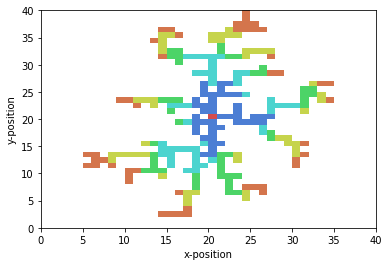

In [213]:
L = 40
lattice = DLA(L)
plt.axes()
plt.xlim([0,L])
plt.ylim([0,L])
for i in range(L):
    for j in range(L):
        if lattice[i,j] == 1:
            if lattice[i,j+40] == 1:
                rectangle = plt.Rectangle((i,j), 1, 1, fc='#d44c4c')
                plt.gca().add_patch(rectangle)
            elif lattice[i,j+40] < 0.2*sum(sum(lattice[:,:40])):
                rectangle = plt.Rectangle((i,j), 1, 1, fc='#4c7ed4')
                plt.gca().add_patch(rectangle)
            elif lattice[i,j+40] < 0.4*sum(sum(lattice[:,:40])):
                rectangle = plt.Rectangle((i,j), 1, 1, fc='#4cd4cf')
                plt.gca().add_patch(rectangle)
            elif lattice[i,j+40] < 0.6*sum(sum(lattice[:,:40])):
                rectangle = plt.Rectangle((i,j), 1, 1, fc='#4cd467')
                plt.gca().add_patch(rectangle)
            elif lattice[i,j+40] < 0.8*sum(sum(lattice[:,:40])):
                rectangle = plt.Rectangle((i,j), 1, 1, fc='#c6d44c')
                plt.gca().add_patch(rectangle)
            else:
                rectangle = plt.Rectangle((i,j), 1, 1, fc='#d4754c')
                plt.gca().add_patch(rectangle)
plt.xlabel("x-position")
plt.ylabel("y-position")
plt.savefig('figures\\3b_DLA.png', dpi=300, bbox_inches='tight')

In [69]:
N_iter = 10
M_list = np.zeros(20)
for i in range(N_iter):
    for j in range(20):
        L = 5*(j+1)
        lattice = DLA(L)
        M_list[j] += sum(sum(lattice)[:,:40])

print(M_list/10)

[   5.2   18.2   32.    63.1  105.   142.   164.5  221.1  293.9  337.9
  367.   506.2  575.9  600.   685.2  864.7  953.8  981.8 1104.  1146.8]


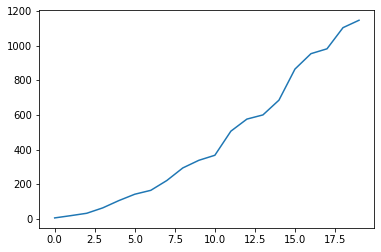

In [78]:
plt.plot(M_list/10)

# Exercise 4

In [1]:
def startUniform(lattice, spin):
    for i in range(len(lattice[0])):
        for j in range(len(lattice[0])):
            lattice[i,j] = spin
    return lattice

In [2]:
def startRandom(lattice):
    for i in range(len(lattice[0])):
        for j in range(len(lattice[0])):
            lattice[i,j] = round(np.random.uniform())*2 - 1

In [ ]:
def calc_dE(lattice, x, y):
    

In [ ]:
def Ising(L, T, dt):
    lattice = np.zeros([L,L])
#     startUniform(lattice, 1)
    startRandom(lattice)
    
    for i in range(int(t/dt)):
        x, y = np.random.uniform()*L, np.random.uniform()*L
        dE = calc_dE(lattice, x, y)
        